**Capstone Project Module #2 - Sendhi Anshari Rasyid**

# **Latar Belakang**
Tak bisa dipungkiri, Bangkok merupakan salah satu destinasi utama yang dituju oleh para turis lokal ataupun internasional yang hendak berlibur ke Thailand. Pada tahun 2019, Bangkok bahkan menempati peringkat pertama pada daftar "Global Destination Cities Index 2019" versi Mastercard, mengalahkan Paris dan London. Setiap tahunnya, tercatat Bangkok memiliki total rata-rata pengunjung sebanyak 22.7 juta orang. [(Wikipedia)](https://en.wikipedia.org/wiki/Tourism_in_Bangkok)

Selain tempat ataupun daerah yang menjadi tujuan wisata, penginapan merupakan salah satu elemen penting yang harus diperhatikan ketika melakukan traveling. Oleh karena itu, Dinas Pariwisata Kota Bangkok ingin melakukan analisis terhadap penginapan yang tersebar di Bangkok dengan menggunakan data dari Airbnb Bangkok. Data tersebut digunakan karena Airbnb merupakan salah satu aplikasi yang menjadi pilihan utama para turis untuk mencari sebuah penginapan terutama di Bangkok.

Hasil analisis tersebut diharapkan dapat digunakan sebagai acuan melakukan evaluasi terhadap penginapan di Bangkok saat ini. Terutama untuk mengetahui apakah persebaran penginapan saat ini sudah cukup merata atau belum.

> *Stakeholder: Kepala Dinas Pariwisata Bangkok, tim R&D Dinas Pariwisata Bangkok, Airbnb, host Airbnb*

# **Rumusan Masalah**

1. Kapankah suatu penginapan ramai dikunjungi oleh para tamu/turis?
1. Apakah persebaran penginapan sudah cukup merata di Bangkok?

# **Tujuan**

1. Mengetahui waktu yang menjadi puncak dari kunjungan pada penginapan di Bangkok
1. Mengetahui daerah mana yang menjadi pusat kunjungan dari para tamu yang singgah di Bangkok

## **Data**
Dataset yang digunakan pada analisis ini merupakan kumpulan dari *host* penginapan dalam aplikasi Airbnb yang berlokasi di sekitar Kota Bangkok, Thailand. Lengkap dengan detail lokasi, ketersediaan kamar, tipe kamar, dan lainnya. Dataset tersebut bisa diakses melalui [tautan ini.](https://drive.google.com/file/d/1Kagt-IMGruvyBV3tH6HYa721JK-TN-56/view?usp=drive_link)

### Penjelasan Dataset

Berikut adalah penjelasan detail dari setiap data yang termasuk dalam dataset tersebut:

-  `Unnamed: 0`: Index
-  `id`: ID Airbnb unik yang dimiliki setiap listing penginapan
-  `name`: Nama listing penginapan
-  `host_id`: ID Airbnb unik yang dimiliki oleh setiap host
-  `host_name`: Nama dari host pemilik penginapan
-  `neighborhood`: Lokasi/daerah di mana penginapan berada
-  `latitude`: Posisi koordinat garis lintang dari penginapan terkait
-  `longitude`: Posisi koordinat garis bujur dari penginapan terkait
-  `room_type`: Tipe dari kamar yang disewakan, terbagi menjadi 3; *entire place, private rooms, shared rooms*
-  `price`: Harga sewa per hari
-  `minimum_nights`: Jumlah minimal untuk menyewa kamar
-  `number_of_reviews`: Jumlah review keseluruhan yang dimiliki oleh penginapan
-  `last_review`: Tanggal review terakhir oleh konsumen
-  `reviews_per_month`: Jumlah review yang diterima oleh penginapan pada satu bulan
-  `calculated_host_listings_count`: Jumlah listing yang dimiliki oleh setiap host
-  `availability_365`: Ketersediaan kamar yang dapat disewa dalam kurun waktu 365 hari
-  `number_of_reviews_ltm`: Jumlah review yang dimiliki oleh penginapan (dalam 12 bulan terakhir)

### Data Preparation
Tahap persiapan dengan melakukan *import* beberapa *library* yang akan digunakan dalam mengelola dan menganalisis data lebih lanjut.

In [1244]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, shapiro, kstest
import warnings
warnings.filterwarnings('ignore')

In [1245]:
#Import Dataset
df=pd.read_csv('Airbnb Listings Bangkok.csv')

#Menampilkan 5 data sample acak yang terdapat di dalam dataset
display(df.sample(5))

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
7241,7241,32966350,Diplomat Room+ABF for 2 persons near Grand Palace,231520723,Pongthanit,Phra Nakhon,13.762730,100.499250,Hotel room,3995,1,0,NaN,NaN,8,362,0
13342,13342,662597385853983093,"Ngamwomgwan 47 ,Bangkok",122584697,Chanida,Lak Si,13.857519,100.559347,Entire home/apt,10000,1,0,NaN,NaN,1,365,0
6809,6809,31554280,Bangkok,137426624,Nutcha,Suanluang,13.737570,100.641470,Entire home/apt,1800,2,0,NaN,NaN,2,179,0
531,531,4696346,Nice room,23756033,Kwan,Din Daeng,13.775880,100.560330,Private room,700,1,0,NaN,NaN,2,179,0
3720,3720,20066499,Modern 1 BedR condo- few mins frm BTS Wongwian Yai,47767677,Pé,Thon buri,13.719440,100.491770,Entire home/apt,990,1,50,2022-12-18,0.8,2,276,6


> Untuk memperjelas data yang diinformasikan, akan dilakukan pengubahan beberapa nama kolom sebagai berikut:
>- `calculated_host_listings_count` menjadi `host_listings_count`
>- `neighbourhood` menjadi `location`
>- `available_365` menjadi `available_day`

In [1246]:
#Mengganti nama kolom
df=df.rename(columns={'calculated_host_listings_count':'host_listings_count', 'neighbourhood':'location', 'availability_365':'available_day'})
df.head(5)

,Unnamed: 0,id,name,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


### Data Understanding dan Data Cleaning
Sebelum melakukan analisis, terlebih dahulu dilakukan *data understanding* untuk lebih memahami isi dataset. Serta *data cleaning* untuk mengantisipasi kehadiran *error* ataupun *missing value* pada sebuah dataset.

Kedua hal tersebut dilakukan agar *data analysis* yang dilakukan nantinya bisa lebih efisien dan memiliki hasil yang maksimal.

Adapun beberapa tahapan tahapan yang akan saya lakukan, terdiri dari:

1. Identifikasi Data
1. Identifikasi Kolom yang Akan Dianalisis
1. Identifikasi Duplikasi Data pada Primary Key
1. Identifikasi dan Penanganan *Missing Value*
1. Identifikasi *Unique Data*
1. Identifikasi dan Penanganan *Outlier*

##### 1. Identifikasi Data

Tahap pertama yang dilakukan adalah memeriksa berbagai elemen yang terdapat pada sebuah dataset. Mulai dari jumlah data, tipe data dari masing-masing kolom, dan lainnya. Sebelum akhirnya mengambil keputusan untuk memanipulasi atau bahkan menghapus beberapa elemen data yang tidak dibutuhkan pada tahap analisis.

In [1247]:
#Mengetahui jumlah data yang terdapat pada dataset
a,b = df.shape
print(f'Jumlah data yang terdapat pada adalah sebanyak {a} baris dan {b} kolom.\n')

#Melihat detail dataset
df.info()

Jumlah data yang terdapat pada adalah sebanyak 15854 baris dan 17 kolom.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15854 non-null  int64  
 1   id                     15854 non-null  int64  
 2   name                   15846 non-null  object 
 3   host_id                15854 non-null  int64  
 4   host_name              15853 non-null  object 
 5   location               15854 non-null  object 
 6   latitude               15854 non-null  float64
 7   longitude              15854 non-null  float64
 8   room_type              15854 non-null  object 
 9   price                  15854 non-null  int64  
 10  minimum_nights         15854 non-null  int64  
 11  number_of_reviews      15854 non-null  int64  
 12  last_review            10064 non-null  object 
 13  reviews_per_month      10064 non

> Beberapa informasi yang bisa didapatkan berdasarkan data di atas adalah sebagai berikut:
> - Jumlah data yang terdapat pada dataset ini adalah sebanyak 15854 baris yang terbagi pada 17 kolom.
>- Jumlah data pada kolom `last_review` dan `reviews_per_month` hanya sebanyak 10064 data saja. Jauh berbeda dengan total jumlah data keseluruhan, yaitu sebanyak 15854 data. Dapat disimpulkan (sementara) bahwa pada kedua kolom tersebut terdapat banyak data *Null*.
>- Tipe data yang terdapat di dalam dataset terbagi menjadi 12 kolom numerik dan 5 kolom non-numerik/object.
>- Akan dilakukan penambahan kolom `last_review_month` dan `last_review_year` untuk mengekstraksi informasi bulan dari review yang akan digunakan pada tahap analisis.
>- Mengubah format `last_review` menjadi %d-%m-%Y agar lebih mudah dipahami.

In [1248]:
#Penambahan kolom 'last_review_month' pada Dataframe
df['last_review_month'] = pd.to_datetime(df['last_review']).dt.strftime('%B')
df[['last_review_month']].sample(5)

,last_review_month
15357,December
7221,November
11731,NaN
8437,May
6879,December


In [1249]:
#Penambahan kolom 'last_review_year' pada Dataframe
df['last_review_year'] = pd.to_datetime(df['last_review']).dt.strftime('%Y')
df[['last_review_year']].sample(5)

,last_review_year
5420,NaN
4691,2020
4911,NaN
22,2018
9406,2022


In [1250]:
#Penambahan kolom 'last_review' pada Dataframe
df['last_review'] = pd.to_datetime(df['last_review']).dt.strftime('%d-%m-%Y')
df[['last_review']].sample(5)

,last_review
13853,NaN
6812,NaN
15167,NaN
3135,05-12-2022
11419,14-12-2022


In [1251]:
#Melihat statistik deskriptif dari masing-masing kolom data (numerik dan non-numerik)
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,location,room_type,last_review,last_review_month,last_review_year
count,15846,15853,15854,15854,10064,10064,10064
unique,14794,5312,50,4,1669,12,11
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,11-12-2022,December,2022
freq,45,228,2153,8912,189,3735,6628


> Berdasarkan informasi di atas, kita bisa mengetahui beberapa hal:
> - Pada kolom `Price` diketahui memiliki nilai minimal sebesar 0, di mana merupakan sebuah anomali. Karena *value* tersebut mengindikasikan bahwa ada sebuah *listing* penginapan yang bisa disewa dengan gratis. Sedangkan sebuah *listing* seharusnya memiliki *value* > 0 agar bisa disewakan.
> - Jumlah data *unique* pada kolom `name`, `host_name`, `location`, `room_type`, dan `last_review` memiliki selisih yang signifikan dengan total data *(count)* keseluruhan, sehingga dapat disimpulkan terdapat banyak duplikasi data. Hal ini bukanlah suatu anomali, mengingat kolom-kolom tersebut memang memiliki *value* yang berulang.

In [1252]:
#Melihat data yang memiliki 'price' = 0
price_0 = df.loc[df['price'] == 0]

> Diketahui terdapat 1 data yang memiliki `price` = 0. Karena merupakan sebuah anomali data, maka diputuskan untuk menghapus row data tersebut.

In [1253]:
#Menghapus row data yang memiliki 'price' = 0
df.drop(11103, inplace=True)

In [1254]:
#Mengecek ulang data yang memiliki 'price' = 0
df.loc[df['price'] == 0]

,Unnamed: 0,id,name,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm,last_review_month,last_review_year


> Data dengan `price` = 0 sudah tidak ada di dalam dataset.

In [1255]:
#Reset index setelah melakukan drop row
df.set_index('name', inplace=True)
df.reset_index(inplace=True)

In [1256]:
#Pengecekan ulang statistik deskriptif dari masing-masing kolom data
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
count,15853.000000,1.585300e+04,1.585300e+04,15853.000000,15853.000000,1.585300e+04,15853.000000,15853.000000,10064.000000,15853.000000,15853.000000,15853.000000
mean,7926.299628,1.579496e+17,1.540928e+08,13.745144,100.559903,3.217907e+03,15.293257,16.655207,0.813145,13.890431,244.394058,3.481738
std,4576.874737,2.946082e+17,1.318666e+08,0.043041,0.050912,2.497290e+04,50.816496,40.614397,1.090196,30.270630,125.832224,8.917176
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,2.780000e+02,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.000000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.000000,3.503224e+07,1.224556e+08,13.738490,100.561410,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11890.000000,5.256284e+07,2.390274e+08,13.759500,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,location,room_type,last_review,last_review_month,last_review_year
count,15845,15852,15853,15853,10064,10064,10064
unique,14793,5311,50,4,1669,12,11
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,11-12-2022,December,2022
freq,45,228,2152,8912,189,3735,6628


> Dapat terlihat bahwa nilai min dari `price` sudah bukan 0 lagi, yang berarti data '11103' yang memiliki value=0 sudah berhasil terhapus.

##### 2. Identifikasi Duplikasi Data pada Primary Key

Karena kolom `ID` bertindak sebagai *primary key* pada dataset ini, maka prioritas pertama adalah mengecek apakah kolom tersebut memiliki duplikasi atau tidak agar akurasi dari analisis yang dilakukan bisa lebih akurat.

In [1257]:
#Pengecekan duplikasi data pada kolom ID
print("Jumlah duplikasi data pada kolom 'ID' adalah sebanyak",
      df['id'].duplicated().sum(), "data.")

Jumlah duplikasi data pada kolom 'ID' adalah sebanyak 0 data.


> Setelah dilakukan pengecekan, ternyata kolom `ID` tidak memiliki duplikasi. 

Pada kolom lainnya tidak dicek apakah memiliki duplikasi atau tidak, karena sudah terwakili oleh pengecekan kolom `ID` ini. Kemunculan data berulang yang terjadi pada kolom `name`, `host_name`, `host_id`, `neighbourhood`, ataupun lainnya tidak akan berpengaruh pada proses analisis berikutnya.

##### 3. Identifikasi Kolom yang Akan Dianalisis

Sebelum memasuki tahapan analisis data, terlebih dahulu mengidentifikasi kolom mana yang tidak akan digunakan dalam tahap tersebut karena tidak relevan dengan rumusan masalah. Kolom yang dihapus adalah `Unnamed: 0`, karena informasinya hanya merupakan duplikasi dari informasi index setiap data.

In [1258]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15853 entries, 0 to 15852
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15845 non-null  object 
 1   id                     15853 non-null  int64  
 2   host_id                15853 non-null  int64  
 3   host_name              15852 non-null  object 
 4   location               15853 non-null  object 
 5   latitude               15853 non-null  float64
 6   longitude              15853 non-null  float64
 7   room_type              15853 non-null  object 
 8   price                  15853 non-null  int64  
 9   minimum_nights         15853 non-null  int64  
 10  number_of_reviews      15853 non-null  int64  
 11  last_review            10064 non-null  object 
 12  reviews_per_month      10064 non-null  float64
 13  host_listings_count    15853 non-null  int64  
 14  available_day          15853 non-null  int64  
 15  nu

##### 4. Identifikasi dan Penanganan Missing Value

In [1259]:
#Fungsi tampil missing value
def persentase_null():
    return round(df.isnull().sum() * 100 / len(df), 2)

def jumlah_null():
    return df.isna().sum()

#Dataframe missing value
df_null = pd.DataFrame({
    'Jumlah Data': jumlah_null(),
    'Persentase': persentase_null()
})

#Fungsi pengecekan keberadaan missing value dari setiap kolom
def cek_missing_value():
    print('Jumlah missing value di setiap kolom adalah sebagai berikut:\n')
    print(df_null)
    print('\nJumlah missing value dari semua kolom sebanyak', jumlah_null().sum(), 'data.')

In [1260]:
#Pengecekan missing value
cek_missing_value()

Jumlah missing value di setiap kolom adalah sebagai berikut:

                       Jumlah Data  Persentase
name                   8            0.05      
id                     0            0.00      
host_id                0            0.00      
host_name              1            0.01      
location               0            0.00      
latitude               0            0.00      
longitude              0            0.00      
room_type              0            0.00      
price                  0            0.00      
minimum_nights         0            0.00      
number_of_reviews      0            0.00      
last_review            5789         36.52     
reviews_per_month      5789         36.52     
host_listings_count    0            0.00      
available_day          0            0.00      
number_of_reviews_ltm  0            0.00      
last_review_month      5789         36.52     
last_review_year       5789         36.52     

Jumlah missing value dari semua kolom sebany

>1. Beberapa kolom masih memiliki *missing value*, dengan detail sebagai berikut:
>- `name` sebanyak 8 data atau 0.05%
>- `host_name` sebanyak 1 data atau 0.01%
>- `last_review` sebanyak 5789 data atau 36.52%
>- `reviews_per_month` sebanyak 5789 data atau 36.52%
>- `last_review_month` sebanyak 5789 data atau 36.52%
>- `last_review_year` sebanyak 5789 data atau 36.52%
>2. Total dari keseluruhan *missing value* yang terdapat pada dataset adalah sejumlah 11587 data.
>3. Walaupun memiliki *missing value* yang cukup besar presentasinya, karena kolom `last_review` akan dijadikan sebagai salah satu acuan dalam melakukan analisis, maka kolom tersebut tetap dipertahankan.

Kolom-kolom yang masih memiliki *missing value* tersebut akan dicek satu per satu, sebelum diputuskan tindak lanjut seperti apa yang harus dilakukan pada data-data tersebut.

In [1261]:
#Pengecekan missing value pada kolom name
df[df['name'].isna()]

,name,id,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm,last_review_month,last_review_year
439,NaN,4549768,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0,NaN,NaN
544,NaN,4720818,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0,NaN,NaN
572,NaN,4245018,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0,NaN,NaN
669,NaN,6148415,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0,NaN,NaN
1030,NaN,8055144,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0,NaN,NaN
1282,NaN,10000742,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,13-05-2017,0.07,1,365,0,May,2017
1594,NaN,10710165,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0,NaN,NaN
2075,NaN,13142743,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,11-12-2017,0.03,3,220,0,December,2017


In [1262]:
#Proses mengubah missing value pada kolom `name` menjadi "No Name"
df['name'].fillna('No Name', inplace=True)
df[df['name'] == 'No Name']

,name,id,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm,last_review_month,last_review_year
439,No Name,4549768,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0,NaN,NaN
544,No Name,4720818,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0,NaN,NaN
572,No Name,4245018,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0,NaN,NaN
669,No Name,6148415,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0,NaN,NaN
1030,No Name,8055144,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0,NaN,NaN
1282,No Name,10000742,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,13-05-2017,0.07,1,365,0,May,2017
1594,No Name,10710165,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0,NaN,NaN
2075,No Name,13142743,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,11-12-2017,0.03,3,220,0,December,2017


> Seluruh *missing value* pada kolom `name` kini telah diisi oleh *value* "No Name."

In [1263]:
#Pengecekan missing value pada kolom host name
df[df['host_name'].isna()]

,name,id,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm,last_review_month,last_review_year
3571,Cozy Hideaway,19682464,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,29-07-2017,0.02,1,365,0,July,2017


In [1264]:
#Proses mengubah missing value pada kolom `name` menjadi "No Name"
df['host_name'].fillna('No Name', inplace=True)
df[df['host_name'] == 'No Name']

,name,id,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm,last_review_month,last_review_year
3571,Cozy Hideaway,19682464,137488762,No Name,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,29-07-2017,0.02,1,365,0,July,2017


> *Missing value* pada kolom `host_name` kini telah diisi oleh *value* "No Name."

In [1265]:
#Pengecekan missing value pada kolom last_review
df[df['last_review'].isna()]

,name,id,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm,last_review_month,last_review_year
1,"Easy going landlord,easy place",27979,120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0,NaN,NaN
2,modern-style apartment in Bangkok,28745,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0,NaN,NaN
4,Suite Room 3 at MetroPoint,941865,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0,NaN,NaN
7,1 chic bedroom apartment in BKK,1738669,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0,NaN,NaN
14,"Deluxe Condo, Nana, Pool/GYM/Sauna",959254,5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,790465040741092826,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0,NaN,NaN
15849,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,790474503157243541,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0,NaN,NaN
15850,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475335086864240,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0,NaN,NaN
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475546213717328,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0,NaN,NaN


In [1266]:
#Proses mengubah missing value pada kolom `last_review` menjadi "-"
df['last_review'].fillna('-', inplace=True)
df[df['last_review'] == '-']

,name,id,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm,last_review_month,last_review_year
1,"Easy going landlord,easy place",27979,120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,-,NaN,2,358,0,NaN,NaN
2,modern-style apartment in Bangkok,28745,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,-,NaN,1,365,0,NaN,NaN
4,Suite Room 3 at MetroPoint,941865,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,-,NaN,3,365,0,NaN,NaN
7,1 chic bedroom apartment in BKK,1738669,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,-,NaN,1,365,0,NaN,NaN
14,"Deluxe Condo, Nana, Pool/GYM/Sauna",959254,5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,-,NaN,1,365,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,790465040741092826,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,-,NaN,1,362,0,NaN,NaN
15849,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,790474503157243541,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,NaN,14,365,0,NaN,NaN
15850,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475335086864240,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,NaN,14,365,0,NaN,NaN
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475546213717328,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,NaN,14,365,0,NaN,NaN


> *Missing value* pada kolom `last_review` kini telah diisi oleh *value* "-"

In [1267]:
#Pengecekan missing value pada kolom reviews_per_month
df[df['reviews_per_month'].isna()]

,name,id,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm,last_review_month,last_review_year
1,"Easy going landlord,easy place",27979,120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,-,NaN,2,358,0,NaN,NaN
2,modern-style apartment in Bangkok,28745,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,-,NaN,1,365,0,NaN,NaN
4,Suite Room 3 at MetroPoint,941865,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,-,NaN,3,365,0,NaN,NaN
7,1 chic bedroom apartment in BKK,1738669,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,-,NaN,1,365,0,NaN,NaN
14,"Deluxe Condo, Nana, Pool/GYM/Sauna",959254,5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,-,NaN,1,365,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,790465040741092826,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,-,NaN,1,362,0,NaN,NaN
15849,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,790474503157243541,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,NaN,14,365,0,NaN,NaN
15850,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475335086864240,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,NaN,14,365,0,NaN,NaN
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475546213717328,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,NaN,14,365,0,NaN,NaN


In [1268]:
#Proses mengubah missing value pada kolom `reviews_per_month` menjadi "0"
df['reviews_per_month'].fillna('0', inplace=True)
df[df['reviews_per_month'] == '0']

,name,id,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm,last_review_month,last_review_year
1,"Easy going landlord,easy place",27979,120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,-,0,2,358,0,NaN,NaN
2,modern-style apartment in Bangkok,28745,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,-,0,1,365,0,NaN,NaN
4,Suite Room 3 at MetroPoint,941865,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,-,0,3,365,0,NaN,NaN
7,1 chic bedroom apartment in BKK,1738669,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,-,0,1,365,0,NaN,NaN
14,"Deluxe Condo, Nana, Pool/GYM/Sauna",959254,5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,-,0,1,365,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,790465040741092826,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,-,0,1,362,0,NaN,NaN
15849,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,790474503157243541,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,0,14,365,0,NaN,NaN
15850,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475335086864240,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,0,14,365,0,NaN,NaN
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475546213717328,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,0,14,365,0,NaN,NaN


> *Missing value* pada kolom `reviews_per_month` kini telah diisi oleh *value* "0"

In [1269]:
#Pengecekan missing value pada kolom 'last_review_month'
df[df['last_review_month'].isna()]

,name,id,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm,last_review_month,last_review_year
1,"Easy going landlord,easy place",27979,120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,-,0,2,358,0,NaN,NaN
2,modern-style apartment in Bangkok,28745,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,-,0,1,365,0,NaN,NaN
4,Suite Room 3 at MetroPoint,941865,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,-,0,3,365,0,NaN,NaN
7,1 chic bedroom apartment in BKK,1738669,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,-,0,1,365,0,NaN,NaN
14,"Deluxe Condo, Nana, Pool/GYM/Sauna",959254,5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,-,0,1,365,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,790465040741092826,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,-,0,1,362,0,NaN,NaN
15849,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,790474503157243541,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,0,14,365,0,NaN,NaN
15850,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475335086864240,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,0,14,365,0,NaN,NaN
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475546213717328,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,0,14,365,0,NaN,NaN


In [1270]:
#Proses mengubah missing value pada kolom `last_review_month` menjadi "-"
df['last_review_month'].fillna('-', inplace=True)
df[df['last_review_month'] == '-']

,name,id,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm,last_review_month,last_review_year
1,"Easy going landlord,easy place",27979,120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,-,0,2,358,0,-,NaN
2,modern-style apartment in Bangkok,28745,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,-,0,1,365,0,-,NaN
4,Suite Room 3 at MetroPoint,941865,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,-,0,3,365,0,-,NaN
7,1 chic bedroom apartment in BKK,1738669,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,-,0,1,365,0,-,NaN
14,"Deluxe Condo, Nana, Pool/GYM/Sauna",959254,5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,-,0,1,365,0,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,790465040741092826,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,-,0,1,362,0,-,NaN
15849,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,790474503157243541,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,0,14,365,0,-,NaN
15850,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475335086864240,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,0,14,365,0,-,NaN
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475546213717328,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,0,14,365,0,-,NaN


> *Missing value* pada kolom `last_review_month` kini telah diisi oleh *value* "-"

In [1271]:
#Pengecekan missing value pada kolom 'last_review_year'
df[df['last_review_year'].isna()]

,name,id,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm,last_review_month,last_review_year
1,"Easy going landlord,easy place",27979,120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,-,0,2,358,0,-,NaN
2,modern-style apartment in Bangkok,28745,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,-,0,1,365,0,-,NaN
4,Suite Room 3 at MetroPoint,941865,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,-,0,3,365,0,-,NaN
7,1 chic bedroom apartment in BKK,1738669,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,-,0,1,365,0,-,NaN
14,"Deluxe Condo, Nana, Pool/GYM/Sauna",959254,5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,-,0,1,365,0,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,790465040741092826,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,-,0,1,362,0,-,NaN
15849,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,790474503157243541,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,0,14,365,0,-,NaN
15850,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475335086864240,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,0,14,365,0,-,NaN
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475546213717328,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,0,14,365,0,-,NaN


In [1272]:
#Proses mengubah missing value pada kolom `last_review_year` menjadi "-"
df['last_review_year'].fillna('-', inplace=True)
df[df['last_review_year'] == '-']

,name,id,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm,last_review_month,last_review_year
1,"Easy going landlord,easy place",27979,120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,-,0,2,358,0,-,-
2,modern-style apartment in Bangkok,28745,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,-,0,1,365,0,-,-
4,Suite Room 3 at MetroPoint,941865,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,-,0,3,365,0,-,-
7,1 chic bedroom apartment in BKK,1738669,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,-,0,1,365,0,-,-
14,"Deluxe Condo, Nana, Pool/GYM/Sauna",959254,5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,-,0,1,365,0,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,790465040741092826,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,-,0,1,362,0,-,-
15849,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,790474503157243541,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,0,14,365,0,-,-
15850,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475335086864240,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,0,14,365,0,-,-
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475546213717328,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,0,14,365,0,-,-


> *Missing value* pada kolom `last_review_year` kini telah diisi oleh *value* "-"

In [1273]:
#Dataframe missing value
df_null = pd.DataFrame({
    'Jumlah Data': jumlah_null(),
    'Persentase': persentase_null()
})

#Pengecekan ulang missing value dari setiap kolom
cek_missing_value()

Jumlah missing value di setiap kolom adalah sebagai berikut:

                       Jumlah Data  Persentase
name                   0            0.0       
id                     0            0.0       
host_id                0            0.0       
host_name              0            0.0       
location               0            0.0       
latitude               0            0.0       
longitude              0            0.0       
room_type              0            0.0       
price                  0            0.0       
minimum_nights         0            0.0       
number_of_reviews      0            0.0       
last_review            0            0.0       
reviews_per_month      0            0.0       
host_listings_count    0            0.0       
available_day          0            0.0       
number_of_reviews_ltm  0            0.0       
last_review_month      0            0.0       
last_review_year       0            0.0       

Jumlah missing value dari semua kolom sebany

> Dapat terlihat pada informasi di atas, bahwa kini pada dataset sudah tidak memiliki *missing value* lagi.

##### 5. Identifikasi Unique Data

In [1274]:
pd.set_option('display.max_colwidth', 1)

#Menampilkan data unik dari setiap kolom
listItem=[]
for col in df.columns:
    listItem.append([col, df[col].nunique(), df[col].unique()])

UniqueTable=pd.DataFrame(columns=['Nama Kolom', 'Jumlah Data Unik', 'Sample Unik'],
                        data=listItem)
UniqueTable

,Nama Kolom,Jumlah Data Unik,Sample Unik
0,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, modern 1BR condo, 2 bed 2 bath, BTS, Supermarkets, Monthly, Private, relaxed with amenities, S1 hostel (Dorm) Sathorn Bangkok, 3 minutes walk to Phrom Phong BTS, 1 BDM CONDO SAPHAN KWAI/ARI walk to JJ/BTS/MRT, เฮ้าส์โหมด House Mode, ❂100% Private&Central Light EnSuite, Spacious Studio kitchen/wifi, 2. Bangkok bright Apartment 201, 1.Bangkok great value Studio WIFI, BKK City Fab Luxx Studio free wifi @1194, 5. Bangkok Bright Apartment -WIFI, 6. Bangkok nice, cosy Apartment 201, 7. Bangkok big bright Apartment 402, STUDIO-WIFI-RAIN SHOWER-SATHORN, Luxury Riverview Teakwood Apartment-Great Views :), 1 Bed Pool Access Onnut BTS, ...]"
1,id,15853,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 14

> - Setelah dilakukan pengetesan dan pengecekan ulang, kolom `ID` yang bertindak sebagai *primary key* sudah dipastikan tidak memiliki duplikasi data.
> - Kolom `room_type` memiliki 4 opsi *value*, yaitu Entire home/apt, Private room, Hotel room, dan Shared room.
> - Sudah tidak terdapat *missing value.*

##### 5. Identifikasi dan Penanganan Outlier

Sebelum memasuki tahap *data analysis*, terlebih dahulu diidentifikasi outlier berupa data yang bernilai ekstrem. Penanganan outlier ini cukup penting karena dapat meningkatkan kualitas dan juga efektifitas dari suatu analisis.

In [1275]:
#Pengecekan statistik dari beberapa kolom yang akan dicek outlier-nya
df[['minimum_nights', 'available_day', 'price', 'number_of_reviews']].describe()

,minimum_nights,available_day,price,number_of_reviews
count,15853.000000,15853.000000,1.585300e+04,15853.000000
mean,15.293257,244.394058,3.217907e+03,16.655207
std,50.816496,125.832224,2.497290e+04,40.614397
min,1.000000,0.000000,2.780000e+02,0.000000
25%,1.000000,138.000000,9.000000e+02,0.000000
50%,1.000000,309.000000,1.429000e+03,2.000000
75%,7.000000,360.000000,2.429000e+03,13.000000
max,1125.000000,365.000000,1.100000e+06,1224.000000


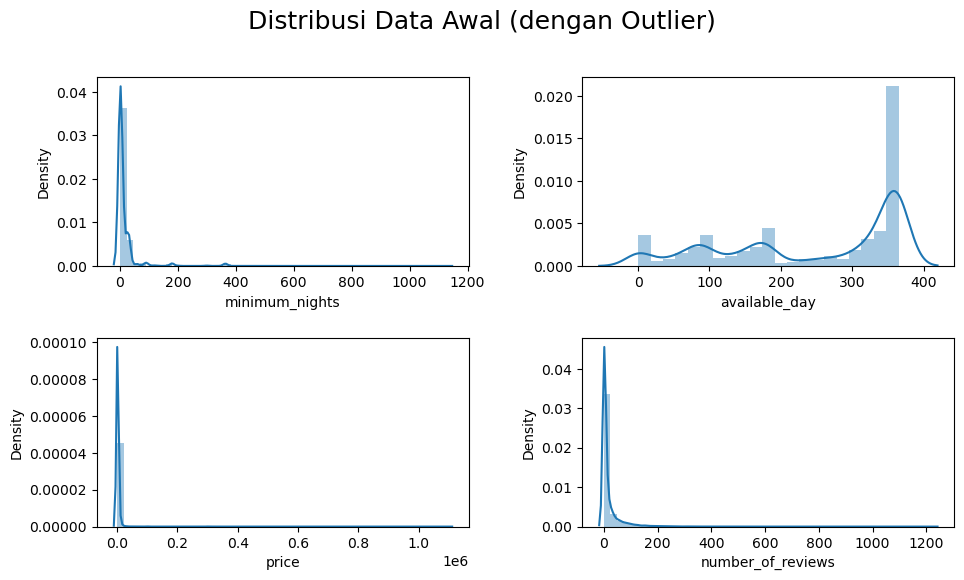

In [1276]:
#Visualisasi data
plt.figure(figsize=(10,6)).suptitle("Distribusi Data Awal (dengan Outlier)", fontsize=18)

columns = ['minimum_nights', 'available_day', 'price', 'number_of_reviews']
for i, columns in enumerate(columns, start=1):
    plt.subplot(2,2,i)
    sns.distplot(df[columns])

plt.tight_layout(pad=2.0)
plt.show()

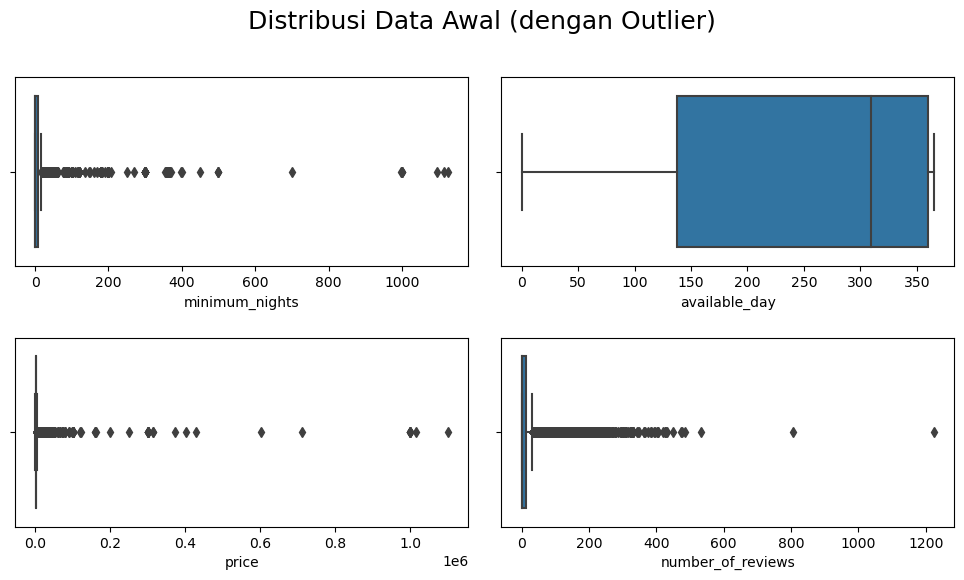

In [1277]:
#Visualisasi data
columns_outlier = ['minimum_nights', 'available_day', 'price', 'number_of_reviews']

plt.figure(figsize=(10,6)).suptitle("Distribusi Data Awal (dengan Outlier)", fontsize=18)

for i, columns in enumerate(columns_outlier, start=1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[columns])

plt.tight_layout(pad=2.0)
plt.show()

In [1278]:
for columns in columns_outlier:
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers=df[(df[columns] < lower_bound) | (df[columns] > upper_bound)][columns]

    print(f"[{columns}]")
    print(f"Nilai batas bawah dari kolom {columns} adalah {lower_bound} dan nilai batas atasnya adalah {upper_bound}.")
    print(f"Outliers pada {columns} adalah sebanyak {outliers.count()} data atau sebesar {round(outliers.count()/df.shape[0]*100,2)}%\n")

[minimum_nights]
Nilai batas bawah dari kolom minimum_nights adalah -8.0 dan nilai batas atasnya adalah 16.0.
Outliers pada minimum_nights adalah sebanyak 3168 data atau sebesar 19.98%

[available_day]
Nilai batas bawah dari kolom available_day adalah -195.0 dan nilai batas atasnya adalah 693.0.
Outliers pada available_day adalah sebanyak 0 data atau sebesar 0.0%

[price]
Nilai batas bawah dari kolom price adalah -1393.5 dan nilai batas atasnya adalah 4722.5.
Outliers pada price adalah sebanyak 1403 data atau sebesar 8.85%

[number_of_reviews]
Nilai batas bawah dari kolom number_of_reviews adalah -19.5 dan nilai batas atasnya adalah 32.5.
Outliers pada number_of_reviews adalah sebanyak 2240 data atau sebesar 14.13%



> Pada hasil identifikasi di atas, dapat diketahui bahwa hanya kolom `available_day` yang tidak memiliki outlier dengan presentase sebesar 0%. Sedangkan kolom lainnya, memiliki outlier dengan detail sebagai berikut:
>- kolom `minimum_nights` sebanyak 3168 data atau sebesar 19.9%
>- kolom `price` sebanyak 1403 data atau sebesar 8.85%
>- kolom `number_of_reviews` sebanyak 2240 data atau sebesar 14.13%

Outlier pada kolom-kolom tersebut diputuskan untuk tetap dipertahankan dan tidak ditindaklanjuti lebih jauh, karena value pada setiap kolomnya masih dalam tahap yang masuk akal. Mengingat kebijakan mengenai penentuan `minimum_nights` dan `price` dilakukan oleh setiap host dengan pertimbangannya masing-masing. Sedangkan `available_day` dan `number_of_reviews` merupakan hasil interaksi organik antara host dan juga guest dalam melakukan booking dan juga memberikan review, di mana itu bukan sesuatu yang bisa dikendalikan.

In [1279]:
#Pengujian Normalitas
alpha = 0.05

for columns in columns_outlier:
    statistic, p_value = shapiro(df[columns])
    print(f'[{columns}]')
    print('Nilai Statistik Uji:', round(statistic, 3))
    print('p-value:', p_value)
    if p_value < alpha:
        print('Data tidak terdistribusi normal.\n')
    else:
        print('Data terdistribusi normal.\n')

[minimum_nights]
Nilai Statistik Uji: 0.28
p-value: 0.0
Data tidak terdistribusi normal.

[available_day]
Nilai Statistik Uji: 0.832
p-value: 0.0
Data tidak terdistribusi normal.

[price]
Nilai Statistik Uji: 0.044
p-value: 0.0
Data tidak terdistribusi normal.

[number_of_reviews]
Nilai Statistik Uji: 0.441
p-value: 0.0
Data tidak terdistribusi normal.



> Karena memiliki banyak outlier dengan nilai yang cukup ekstrem, dapat disimpulkan bahwa data-data yang terdapat pada kolom-kolom tersebut tidak terdistribusi normal. Namun, untuk memvalidasi pernyataan tersebut, tetap dilakukan pengujian normalitas menggunakan metode Shapiro-Wilk pada kolom `minimum_nights`, `available_day`, `price`, dan `number_of_reviews`. Dan hasilnya adalah memang benar, bahwa semua data pada kolom tersebut tidak terdistribusi normal.

##### Hasil Data Understanding dan Data Cleaning

Setelah melalui tahap *data understanding* dan *data cleaning*, kini informasi yang tersaji sudah lebih terkurasi. Sehingga proses selanjutnya, yaitu *data analysis* akan memiliki akurasi yang lebih tinggi dan efisien.

In [1280]:
display(df.head(), df.tail())

,name,id,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm,last_review_month,last_review_year
0,Nice room with superb city view,27934,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,06-01-2020,0.5,2,353,0,January,2020
1,"Easy going landlord,easy place",27979,120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,-,0,2,358,0,-,-
2,modern-style apartment in Bangkok,28745,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,-,0,1,365,0,-,-
3,Spacious one bedroom at The Kris Condo Bldg. 3,35780,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,01-04-2022,0.03,1,323,1,April,2022
4,Suite Room 3 at MetroPoint,941865,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,-,0,3,365,0,-,-


,name,id,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm,last_review_month,last_review_year
15848,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,790465040741092826,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,-,0,1,362,0,-,-
15849,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,790474503157243541,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,0,14,365,0,-,-
15850,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475335086864240,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,0,14,365,0,-,-
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790475546213717328,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,0,14,365,0,-,-
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,790476492384199044,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,-,0,14,365,0,-,-


Secara keseluruhan, pada tahapan *data understanding dan cleaning* ini bisa disimpulkan menjadi beberapa poin berikut:
1. Jumlah keseluruhan pada dataset ini adalah sebanyak 15854 data yang terbagi pada 17 kolom.
1. Anomali data pada kolom `price` telah berhasil ditangani dengan melakukan *drop row data*.
1. Kolom `ID` yang bersifat sebagai *primary key* tidak memiliki duplikasi data.
1. *Missing value* pada kolom `name`, `host_name`, `last_review`, `reviews_per_month` sudah berhasil ditangani.
1. Kolom `room_type` memiliki 4 opsi *value*, yaitu Entire home/apt, Private room, Hotel room, dan Shared room.
1. Seluruh *missing value* telah berhasil ditanggulangi.
1. Kolom yang dilakukan uji normalitas dan juga pengecekan outlier adalah kolom-kolom yang nantinya akan dimasukkan dalam tahap *data analysis*, yaitu `minimum_nights`, `price`, `available_day`, dan `number_of_reviews`.
1. Berdasarkan pengujian, hanya kolom `available_day` yang tidak memiliki outlier sama sekali.
1. Outlier pada kolom `minimum_nights`, `price`, `number_of_reviews` tidak ditanggulangi.Mengingat outlier yang masih ada masih dalam tahap masuk akal, karena diisi berdasarkan kebijakan dari masing-masing host.
1. Setelah dilakukan uji normalitas, dapat disimpulkan bahwa data pada kolom `minimum_nights`, `available_day`, `price`, `number_of_reviews` tidak terdistribusi normal.

### Data Analysis
Setelah dilakukan *data cleaning*, tahap selanjutnya adalah melakukan analisa data untuk menjawab beberapa rumusan masalah yang telah disampaikan. Sebelum proses analisa dilakukan, terlebih dahulu akan ditentukan ditentukan beberapa asumsi untuk mempermudah prosesnya. Beberapa asumsi tersebut adalah:
- Kolom `last_review` akan diasumsikan sebagai hari di mana tamu menginap, karena pada dataset ini tidak tersedia informasi mengenai kapan seorang tamu menginap.
- Kolom `number_of_reviews` akan diasumsikan sebagai total dari tamu yang pernah menginap pada suatu penginapan, karena tidak tersedia informasi detail mengenai total kunjungan tamu pada suatu penginapan.
- Kolom `reviews_per_month` akan diasumsikan sebagai rata-rata jumlah tamu yang menginap pada setiap bulannya.

#### Mengetahui Puncak Kunjungan Wisatawan ke Bangkok

Pada dataset ini terdapat data kunjungan sejak tahun 2012 hingga tahun 2023. Sehingga dapat dilakukan beberapa analisa pada rentang tahun tersebut.

> Sebelum menganalisa lebih jauh, terlebih dahulu diidentifikasi mengenai data `last_review` yang diasumsikan sebagai hari atau tanggal di mana seorang tamu menginap.

In [1281]:
# Mengelompokkan data per tahun
tahun = df[df['last_review_year'] != '-']
hitung_tahun = tahun.groupby('last_review_year').size().reset_index(name='count')
hitung_tahun_sort = hitung_tahun.sort_values('last_review_year')

hitung_bulan = tahun.groupby('last_review_month').size().reset_index(name='count')

# Mengurutkan data berdasarkan bulan
hitung_bulan['last_review_month'] = pd.to_datetime(hitung_bulan['last_review_month'], format='%B', errors='coerce')
# hitung_bulan = hitung_bulan.sort_values('last_review_month')

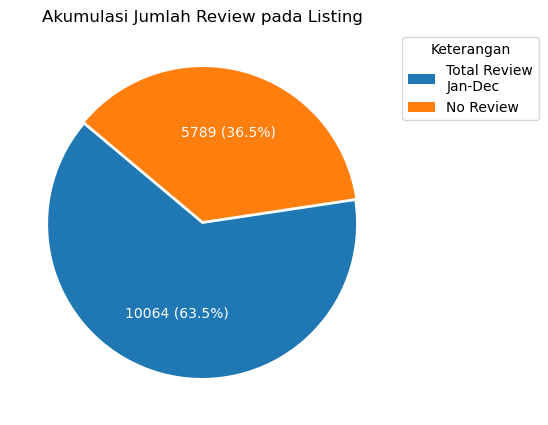

Jumlah listing dengan review Januari-Desember (2012-2022): 10064 data
Jumlah listing tanpa review: 5789 data


In [1282]:
# Menghitung jumlah total count dari Januari sampai Desember
total_count_jan_to_dec = hitung_bulan['count'].sum()

# Menambahkan count untuk nilai '-' (tidak memiliki tahun)
count_blank = df[df['last_review_year'] == '-'].shape[0]

# Membuat data untuk pie chart
labels = ['Total Review\nJan-Dec', 'No Review']
sizes = [total_count_jan_to_dec, count_blank]

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(sizes) / 100, p),
        startangle=140, textprops=dict(color="w"), explode=(0.01, 0.01))
plt.title('Akumulasi Jumlah Review pada Listing')
plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1), title='Keterangan')
plt.show()

# Menampilkan hasil
print('Jumlah listing dengan review Januari-Desember (2012-2022):', total_count_jan_to_dec, 'data')
print("Jumlah listing tanpa review:", count_blank, 'data')

> Diketahui bahwa dari keseluruhan listing, terdapat 5789 data (36.5%) yang tidak memiliki review. Hal ini pada akhirnya memiliki pengertian ambigu, karena bisa diartikan bahwa listing tersebut tidak pernah disewa sama sekali atau para tamu banyak yang tidak melakukan review setelah selesai menginap.

> Hal ini merupakan sesuatu yang harus dibenahi ke depannya. Terutama dari pihak aplikasi Airbnb untuk membuat sebuah kebijakan yang mewajibkan tamu untuk selalu memberikan review setelah selesai menginap sebagai salah satu syarat sebelum melakukan *check out*. Sehingga data yang terkumpul bisa menjadi lebih akurat dan mudah dimengerti, tanpa adanya ambiguitas.

Selanjutnya akan dilakukan analisis untuk mengetahui persebaran tamu yang datang berkunjung dan menginap di Airbnb Bangkok. Pada analisis kali ini saya membaginya berdasarkan bulan dengan data hasil akumulasi kunjungan sepanjang tahun 2012-2022.

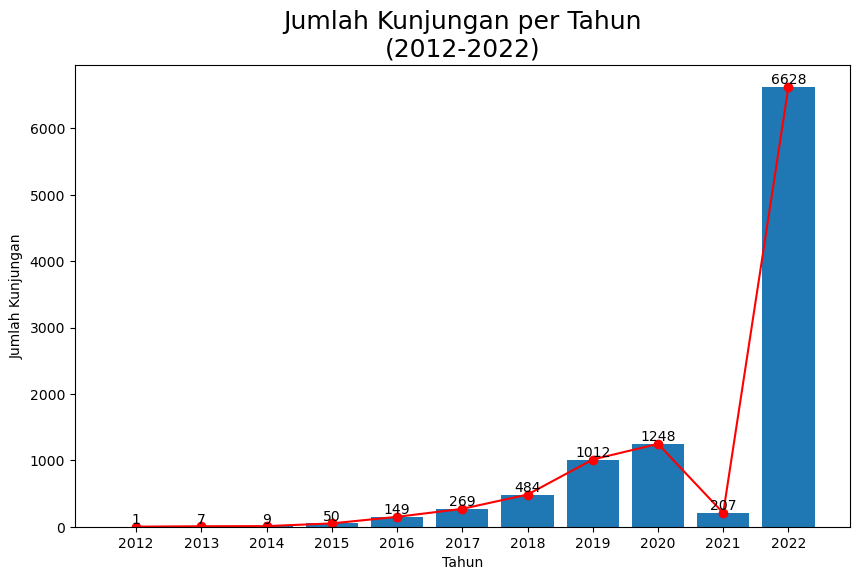

In [1283]:
# Barplot
plt.figure(figsize=(10, 6))
bars = plt.bar(hitung_tahun_sort['last_review_year'], hitung_tahun_sort['count'], label='Bar Plot')
plt.title('Jumlah Kunjungan per Tahun\n(2012-2022)', fontsize=18)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kunjungan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

# Lineplot
line = plt.plot(hitung_tahun_sort['last_review_year'], hitung_tahun_sort['count'], color='red', marker='o')

plt.show()

>- Sejak tahun 2012-2020, jumlah kunjungan ke Bangkok yang menggunakan aplikasi Airbnb terus meningkat secara konstan, sebelum pada akhirnya turun secara signifikan pada tahun 2021.
>- Tahun 2021 terjadi penurunan yang signifikan dan mendadak, meskipun tren data yang terlihat memiliki kecenderungan untuk naik pada tahun-tahun sebelumnya, karena Bangkok melakukan lockdown sepanjang 2021. Lockdown tersebut dilakukan karena terjadi lonjakan kasus COVID-19 yang signifikan pada Januari 2021, yaitu sebanyak 959 kasus COVID-19 yang dilaporkan per harinya. Sehingga berdampak pada sektor pariwisata. [(Wikipedia)](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Thailand)
>- Tahun 2022 terjadi lonjakan kunjungan besar dibandingkan dengan tahun 2021, seiring pulihnya kembali sektor pariwisata di Thailand dan juga diangkatnya anjuran untuk lockdown.

Kita juga dapat membedah infomasi tersebut lebih jauh lagi, yaitu bagaimana tren kunjungan setiap bulannya pada tahun 2022 di Bangkok.

In [1284]:
#Urutkan bulan berdasarkan urutan di kalender
urutan_bulan = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['last_review_month'] = pd.Categorical(df['last_review_month'], categories=urutan_bulan, ordered=True)

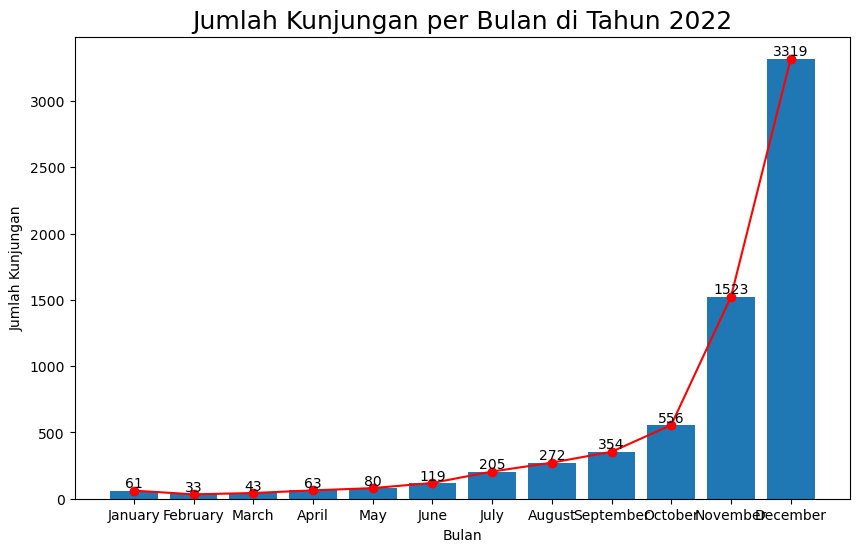

In [1285]:
#Filter data tahun 2022
tahun_2022 = df[df['last_review_year'] == '2022']
tahun_2022 = tahun_2022[tahun_2022['last_review_month'].notna()]

#Mengelompokkan per bulan
hitung_bulan = tahun_2022.groupby('last_review_month').size().reset_index(name='count')
hitung_bulan_sort = hitung_bulan.sort_values('last_review_month')

#Barplot
plt.figure(figsize=(10, 6))
bars = plt.bar(hitung_bulan_sort['last_review_month'], hitung_bulan_sort['count'], label='Bar Plot')
plt.title('Jumlah Kunjungan per Bulan di Tahun 2022', fontsize=18)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kunjungan')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

#Lineplot
line = plt.plot(hitung_bulan_sort['last_review_month'], hitung_bulan_sort['count'], color='red', marker='o')

plt.show()

In [1286]:
#hitung rata-rata kunjungan per bulan di tahun 2022
rerata_kunjungan = hitung_bulan_sort['count'].mean()
print(f'Rata-rata kunjungan turis ke Bangkok per bulan: {round(rerata_kunjungan, 0)} orang.')

Rata-rata kunjungan turis ke Bangkok per bulan: 552.0 orang.


> Jika ditelaah lebih jauh lagi, tren kunjungan pada tahun 2022 cenderung meningkat sejak awal tahun. Di mana mencapai puncaknya pada bulan Desember yang memiliki 3319 orang tamu dengan rata-rata 552 orang tamu di setiap bulannya.

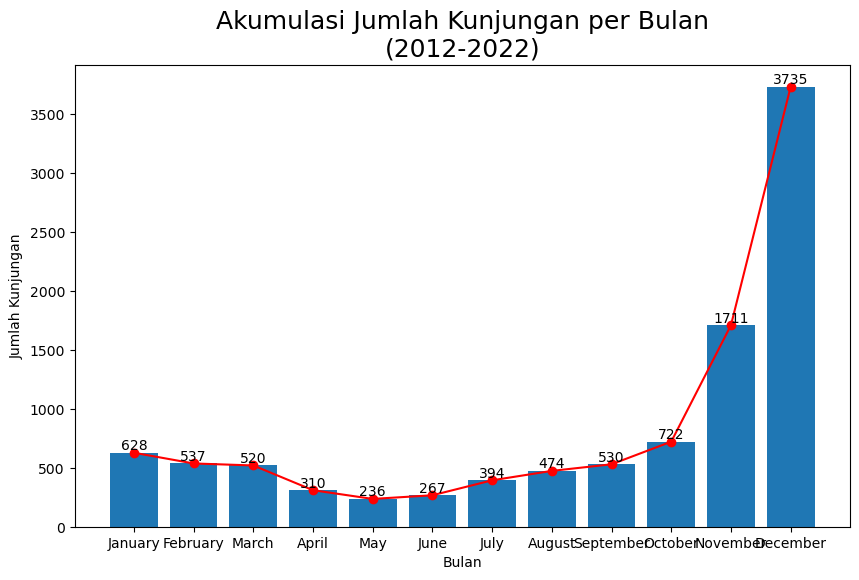

In [1287]:
#Menghitung jumlah kunjungan pada masing-masing bulan
hitung_bulan = df.groupby('last_review_month').size().reset_index(name='count')
hitung_bulan_sort = hitung_bulan.sort_values('last_review_month')

# Barplot
plt.figure(figsize=(10, 6))
bars = plt.bar(hitung_bulan_sort['last_review_month'], hitung_bulan_sort['count'], label='Bar Plot')
plt.title('Akumulasi Jumlah Kunjungan per Bulan\n(2012-2022)', fontsize=18)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kunjungan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

# Lineplot
line = plt.plot(hitung_bulan_sort['last_review_month'], hitung_bulan_sort['count'], color='red', marker='o')

plt.show()

In [1288]:
#hitung rata-rata kunjungan per bulan
rerata_kunjungan = hitung_bulan_sort['count'].mean()
print(f'Rata-rata kunjungan turis ke Bangkok per bulan: {round(rerata_kunjungan, 0)} orang.')

Rata-rata kunjungan turis ke Bangkok per bulan: 839.0 orang.


>- Dapat terlihat bahwa jumlah kunjungan tamu di Bangkok mencapai puncaknya pada akhir tahun (November-Desember). Hal ini merupakan sesuatu yang wajar, mengingat pada akhir tahun termasuk ke dalam "High Season", di mana menjadi waktu favorit bagi para turis untuk berwisata ke Thailand. Karena pada bulan tersebut kondisi cuaca di Thailand (termasuk Bangkok), sedang tidak terlalu panas seperti bulan-bulan lainnya. Sehingga sangat nyaman untuk melakukan aktivitas *outdoor*, seperti scuba diving ataupun island-hopping. [(travelandleisure.com)](https://www.travelandleisure.com/travel-tips/best-time-to-visit-thailand)
>- Meskipun masih termasuk ke dalam "High Season", berdasarkan data yang ada, pada Januari-Maret Bangkok cenderung tak terlalu padat dikunjungi oleh tamu/turis.
>- Bulan April-Juni merupakan waktu di mana paling jarang dikunjungi oleh tamu/turis.
>- Bulan Juli menjadi awal terjadinya peningkatan signifikan dari jumlah kunjungan tamu/turis ke Bangkok. Hal ini secara konsisten terjadi hingga mencapai akhir tahun.
>- Terjadi lonjakan kunjungan yang cukup drastis antara bulan Oktober dan November.
>- Bangkok memiliki rata-rata kunjungan turis per bulan sebanyak 839 orang.

#### Melihat Persebaran Airbnb di Bangkok

Terdapat beberapa hal yang bisa kita ketahui ketika ingin mencari tahu mengenai persebaran Airbnb di Bangkok.

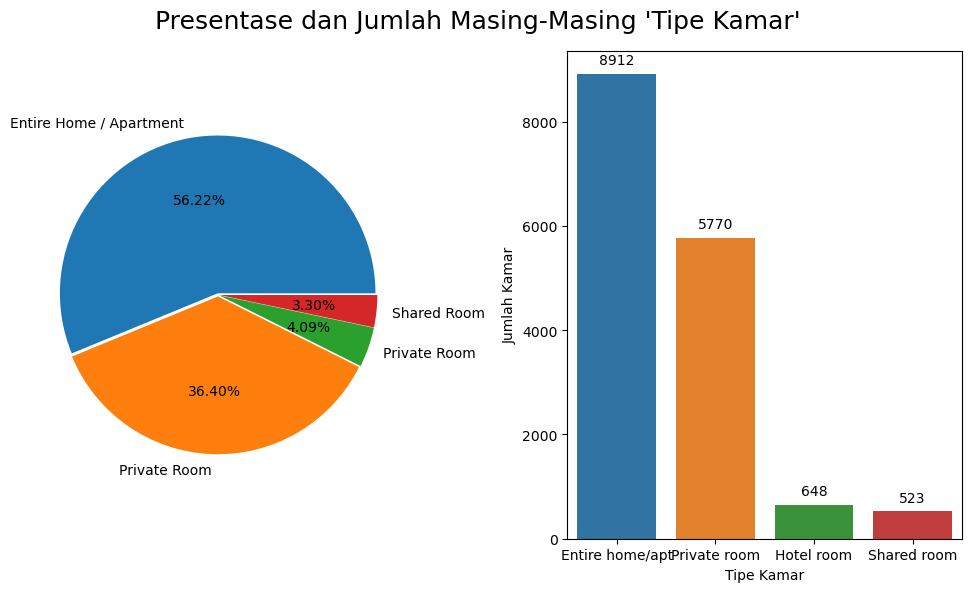

In [1289]:
#Visualisasi grafik jumlah masing-masing `Tipe Kamar`
#pie plot
plt.figure(figsize=(10,6)).suptitle("Presentase dan Jumlah Masing-Masing 'Tipe Kamar'", fontsize=18)
plt.subplot(1,2,1)
plt.pie(df['room_type'].value_counts(), labels=['Entire Home / Apartment','Private Room', 'Private Room', 'Shared Room'], autopct='%.2f%%', explode=(0.01, 0.01, 0.01, 0.01))

#count plot
plt.subplot(1,2,2)
ax = sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)
for val in ax.patches:
    ax.annotate(f'{int(val.get_height())}', (val.get_x() + val.get_width() / 2., val.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Tipe Kamar')
plt.ylabel('Jumlah Kamar')

plt.tight_layout()
plt.show()

> - "Entire Home / Apartment" merupakan tipe kamar yang paling banyak dimiliki oleh penginapan di Bangkok, dengan total sebanyak 8912 kamar atau 56.22%. Lalu disusul oleh tipe "Private Room" dengan total sebanyak 5770 kamar atau 36.4%.
> - Tipe "Hotel Room" dan "Shared Room" memiliki persentase jumlah yang sangat sedikit dan timpang dibanding kedua tipe kamar lainnya, yaitu sebanyak 648 buah atau 4.09% untuk "Hotel Room" dan 523 buah atau 3.30% untuk "Shared Room".

Dapat disimpulkan bahwa penginapan Airbnb di Bangkok saat ini didominasi oleh tipe "Entire Home / Apartment" dengan perbedaan jumlah/persentase yang sangat signifikan dibanding tipe lainnya.

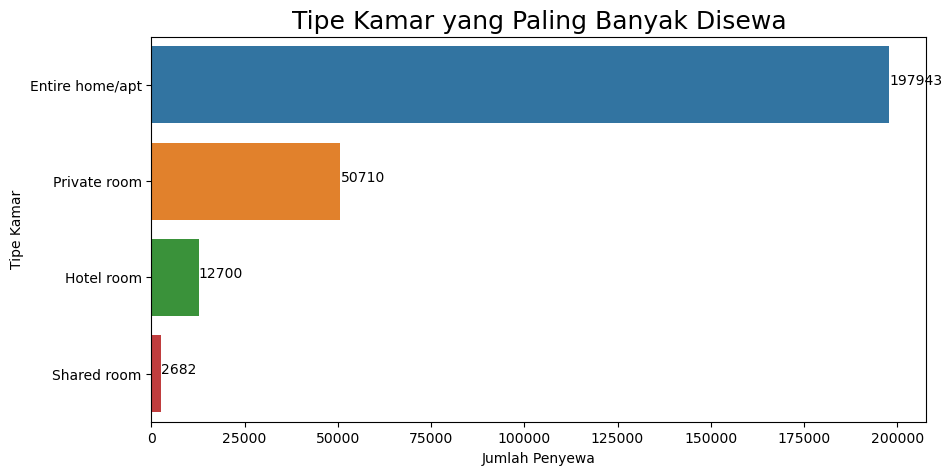

In [1290]:
#Visualisasi barplot
plt.figure(figsize=(10,5))
sns.barplot(x='number_of_reviews', y='room_type', data=df_room_result)
for index, value in enumerate(df_room_result['number_of_reviews']):
    plt.text(value, index, str(value))
plt.xlabel('Jumlah Penyewa')
plt.ylabel('Tipe Kamar')
plt.title('Tipe Kamar yang Paling Banyak Disewa', size=18)
plt.show()

> Sesuai dengan jumlah ketersediaan tipe kamar, tipe 'Entire Home/Apartment' juga merupakan tipe kamar yang paling banyak disewa oleh para tamu yang berkunjung ke Bangkok. Hal ini bisa disebabkan oleh beberapa hal, mulai dari kenyamanan, cara tamu menikmati liburan, hingga jumlah rombongan ketika berkunjung ke Bangkok.
>
> Hasil dari analisa tersebut juga memperlihatkan bahwa para tamu yang berkunjung ke Bangkok lebih nyaman untuk menginap pada sebuah area yang luas dan juga privat di saat bersamaan dalam bentuk sebuah rumah ataupun apartemen. Dibanding hanya sebuah kamar privat dengan luas yang tak begitu besar di 'Private Room' dan 'Hotel Room' ataupun kamar komunal di 'Shared Room'.
>
> Walaupun begitu, hal tersebut sebenarnya bukan suatu masalah. Mengingat keberadaan banyak opsi tipe kamar akan mempermudah para turis untuk memilih penginapan Airbnb sesuai dengan keinginan dan kebutuhannya masing-masing.

Setelah mengetahui jumlah dari masing-masing tipe kamar, kita juga bisa mengetahui mengenai persebaran dari penginapan-penginapan Airbnb tersebut berada di lokasi mana saja.

In [1291]:
#Dataframe jumlah penginapan di setiap daerahnya
df_loct_group = df.groupby(['location'])['id']
df_loct_result = df_loct_group.count()
df_loct_result = df_loct_result.sort_values(ascending=False).reset_index().head(5)
df_loct_result = pd.DataFrame(df_loct_result)

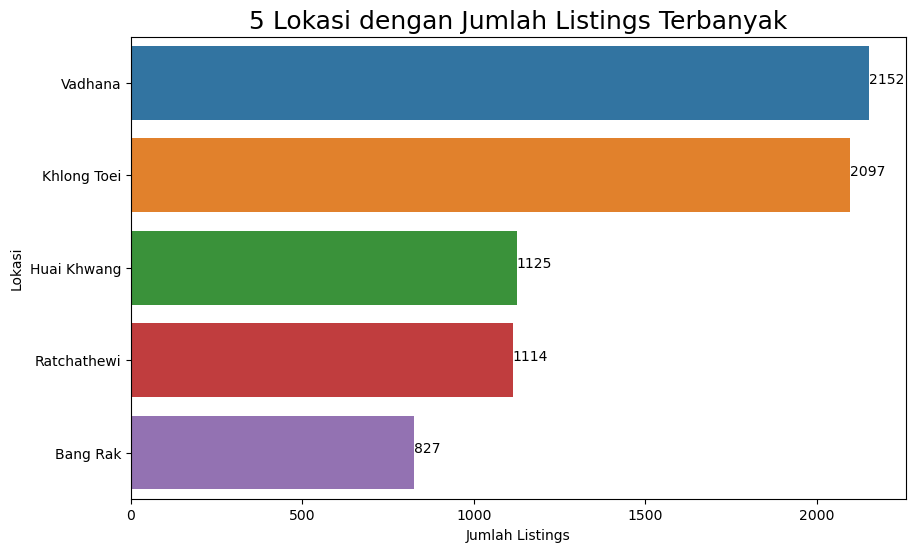

In [1292]:
#Visualisasi barplot
plt.figure(figsize=(10,6))
sns.barplot(x='id', y='location', data=df_loct_result)
for index, value in enumerate(df_loct_result['id']):
    plt.text(value, index, str(value))
plt.xlabel('Jumlah Listings')
plt.ylabel('Lokasi')
plt.title('5 Lokasi dengan Jumlah Listings Terbanyak', size=18)
plt.show()

>- Vadhana, Khlong Toei, Huai Khwang, Ratchathewi, dan Bang Rak merupakan 5 lokasi dengan jumlah listings penginapan Airbnb terbanyak di Bangkok.
>- Vadhana dan Khlong Toei merupakan dua lokasi dengan jumlah listing penginapan terbanyak, dengan masing-masing memiliki 2152 dan 2097 listings. Kedua lokasi tersebut memiliki jumlah listings terbanyak, karena memang dekat dengan berbagai pusat keramaian dan juga objek wisata di Bangkok.
>- Terlihat adanya perbedaan jumlah signifikan antara listing pada Khlong Toei dan Huai Khwang, dengan selisih sebanyak 972 listings.

Kita juga bisa mengetahui jumlah masing-masing tipe kamar dari lima lokasi dengan jumlah listings penginapan Airbnb terbanyak. 

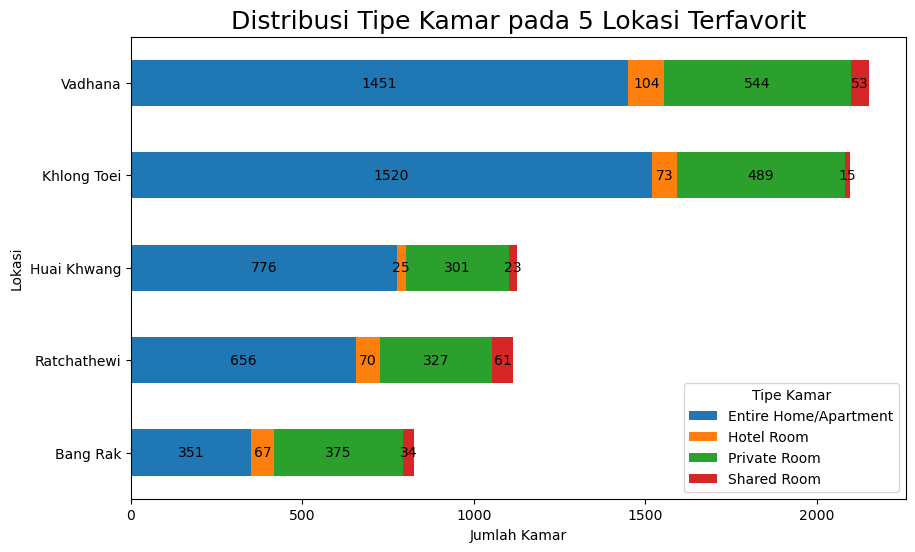

In [1296]:
df_type_home = df.query("""room_type == 'Entire home/apt'""").groupby(['location'])['id'].count().sort_values(ascending=False).head(10).reset_index()
df_type_private = df.query("""room_type == 'Private room'""").groupby(['location'])['id'].count().sort_values(ascending=False).head(10).reset_index()
df_type_hotel = df.query("""room_type == 'Hotel room'""").groupby(['location'])['id'].count().sort_values(ascending=False).head(10).reset_index()
df_type_shared = df.query("""room_type == 'Shared room'""").groupby(['location'])['id'].count().sort_values(ascending=False).head(10).reset_index()

# Menggabungkan data menjadi satu dataframe
df_combined = pd.concat([df_type_home, df_type_private, df_type_hotel, df_type_shared], keys=['Entire Home/Apartment', 'Private Room', 'Hotel Room', 'Shared Room'])

# Mengambil hanya 10 lokasi teratas dengan jumlah kamar terbanyak
top_locations = df_combined.groupby('location')['id'].sum().sort_values(ascending=False).head(5).index

# Filter hanya lokasi teratas
df_filtered = df_combined[df_combined['location'].isin(top_locations)]

# Mengubah data menjadi bentuk yang sesuai dengan grafik
df_pivot = df_filtered.pivot_table(index='location', columns=df_filtered.index.get_level_values(0), values='id', fill_value=0)

# Menyortir setiap lokasi secara terpisah berdasarkan jumlah kamar terbanyak
df_pivot_sorted = df_pivot.loc[df_pivot.sum(axis=1).sort_values(ascending=True).index]

# Plotting
ax = df_pivot_sorted.plot(kind='barh', stacked=True, figsize=(10, 6))
ax.set_xlabel('Jumlah Kamar')
ax.set_ylabel('Lokasi')
ax.set_title('Distribusi Tipe Kamar pada 5 Lokasi Terfavorit', fontsize=18)
ax.legend(title='Tipe Kamar')

# Menambahkan label
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.text(left + width / 2, bottom + height / 2, f'{int(width)}', ha='center', va='center', color='black')

plt.show()

>- Terlihat bahwa tipe kamar 'Entire Home/Apartment' secara garis besar terlihat mendominasi kelima lokasi di atas. Hanya Bang Rak yang memiliki komposisi perbandingan jumlah tipe kamar 'Entire Home/Apartment' dan 'Private Room' yang kurang lebih sama dengan perbedaan sangat tipis.
>- Tipe 'Shared Room' merupakan tipe kamar yang paling sedikit dimiliki oleh setiap lokasi.

Selain itu, kita juga bisa mengetahui apakah jumlah penginapan Airbnb tersebut berpengaruh terhadap dari jumlah kunjungan para tamu/turis pada masing-masing daerahnya.

In [1293]:
#Dataframe jumlah penginapan di setiap daerahnya
df_review_group = df.groupby(['location'])['number_of_reviews']
df_review_result = df_review_group.sum()
df_review_result = df_review_result.sort_values(ascending=False).reset_index().head(5)
df_review_result = pd.DataFrame(df_review_result)

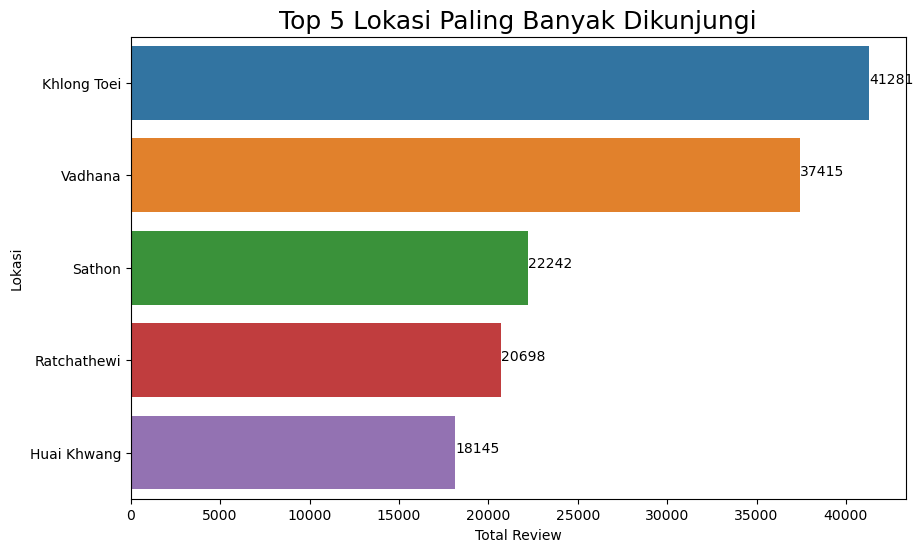

In [1305]:
#Visualisasi barplot
plt.figure(figsize=(10,6))
sns.barplot(x='number_of_reviews', y='location', data=df_review_result)
for index, value in enumerate(df_review_result['number_of_reviews']):
    plt.text(value, index, str(value))
plt.xlabel('Total Review')
plt.ylabel('Lokasi')
plt.title('Top 5 Lokasi Paling Banyak Dikunjungi', size=18)
plt.show()

> Menariknya, lokasi yang memiliki jumlah listings penginapan Airbnb tidak membuatnya menjadi lokasi yang paling banyak diminati oleh para tamu/turis.
>- Khlong Toei, Vadhana, Sathon, Ratchatdewi, dan Huai Khwang jadi lima lokasi favorit dari para tamu/turis untuk menginap selama di Bangkok.
>- Khlong Toei jadi lokasi terfavorit bagi para tamu/turis dalam memilih akomodasi selama berkunjung ke Bangkok dengan total 41281 pengunjung yang tercatat. Menjadikannya sebagai lokasi paling strategis para tamu/turis untuk melakukan mobilisasi. Posisinya bertukar dengan Vadhana yang menempati posisi kedua.
>- Terjadi selisih yang cukup signifikan antara posisi kedua dan ketiga, yaitu Vadhana dan Sathon dalam jumlah kunjungan tamu/turis.

Pada dataset ini, selain mengetahui jumlah akumulasi dari penginapan yang terdaftar di Airbnb ataupun persebaran di setiap lokasinya, kita juga bisa mengetahui siapa host atau pemilik dari masing-masing penginapan tersebut. Sekaligus mengidentifikasi siapakah host yang memiliki penginapan Airbnb paling banyak yang tersebar di Bangkok.

In [1297]:
#Dataframe 5 host yang memiliki penginapan terbanyak di Bangkok
df_host_group = df.groupby(['host_name'])['host_listings_count']
df_host_result = df_host_group.count()
df_host_result = df_host_result.sort_values(ascending=False).reset_index().head(5)
df_host_result = pd.DataFrame(df_host_result)

In [1295]:
#Dataframe tipe kamar terfavorit berdasarkan jumlah review
df_room_group = df.groupby(['room_type'])['number_of_reviews']
df_room_result = df_room_group.sum()
df_room_result = df_room_result.sort_values(ascending=False).reset_index().head(10)
df_room_result = pd.DataFrame(df_room_result)

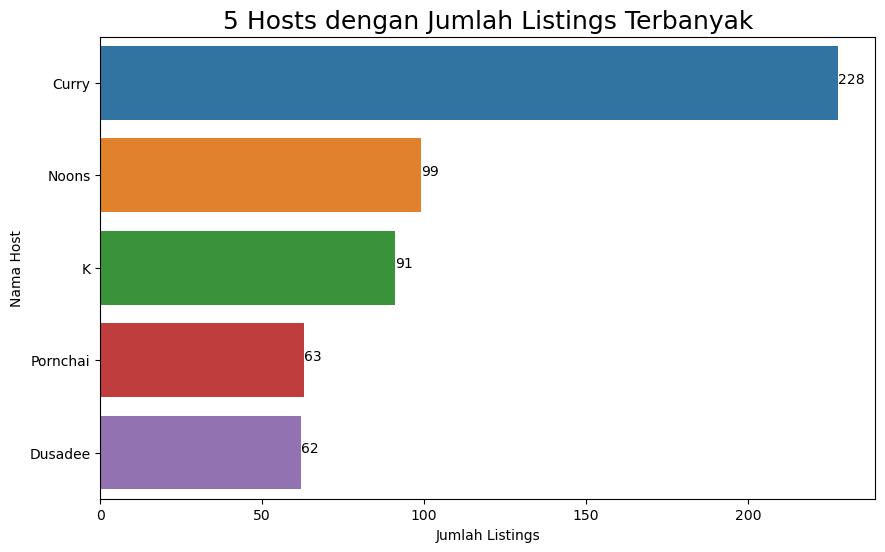

In [1298]:
#Visualisasi barplot
plt.figure(figsize=(10,6))
sns.barplot(x='host_listings_count', y='host_name', data=df_host_result)
for index, value in enumerate(df_host_result['host_listings_count']):
    plt.text(value, index, str(value))
plt.xlabel('Jumlah Listings')
plt.ylabel('Nama Host')
plt.title('5 Hosts dengan Jumlah Listings Terbanyak', size=18)
plt.show()

> Secara garis besar, dari keseluruhan penginapan Airbnb yang tersebar di Bangkok, sebanyak 228 kamar di antaranya dimiliki oleh Curry. Lalu disusul oleh Noons sebanyak 99 kamar, K sebanyak 91 kamari, Pornchai sebanyak 63 kamar, dan Dusadee sebanyak 62 kamar.
>
> Kepemilikan yang mendominasi ini bisa dilihat juga sebagai sebuah monopoli di mana pada akhirnya tamu memiliki kesempatan lebih besar untuk menginap di tempat yang dimiliki Curry. Menyebabkan pendapatan yang didapatkan dari sektor pariwisata (dalam konteks akomodasi) menjadi tidak merata untuk pemilik penginapan Airbnb lainnya.
>
> Sesuatu yang harus dibuatkan regulasinya agar benefit ekonomi dari kedatangan para tamu/turis ke Bangkok bisa tersebar kepada para pengusaha penginapan lokal secara merata.

# **Kesimpulan dan Rekomendasi**

Setelah melakukan analisa di atas, maka bisa ditarik beberapa kesimpulan dan juga rekomendasi yang bisa dilakukan oleh untuk melakukan evaluasi dan juga meningkatkan kualitas penginapan Airbnb di Bangkok.

### Kesimpulan

Sebelum melakukan kesimpulan, terlebih dulu saya ungkapkan beberapa asumsi yang saya lakukan pada untuk melakukan analisis pada dataset ini, yaitu:

- Kolom `last_review` akan diasumsikan sebagai hari di mana tamu menginap, karena pada dataset ini tidak tersedia informasi mengenai kapan seorang tamu menginap.
- Kolom `number_of_reviews` akan diasumsikan sebagai total dari tamu yang pernah menginap pada suatu penginapan, karena tidak tersedia informasi detail mengenai total kunjungan tamu pada suatu penginapan.
- Kolom `reviews_per_month` akan diasumsikan sebagai rata-rata jumlah tamu yang menginap pada setiap bulannya.

Berikut adalah kesimpulan sekaligus jawaban dari rumusan masalah yang telah dikemukaan sebelumnya:

**1. Kapankah suatu penginapan ramai dikunjungi oleh para tamu/turis?**

- Secara keseluruhan, tren kunjungan ke Bangkok mengalami peningkatan pada setiap tahunnya (kecuali pada tahun 2021).
- Tahun 2022 merupakan tahun dengan kunjungan tamu/turis terbanyak ke Bangkok, setelah mengalami penurunan signifikan pada tahun 2021 yang disebabkan oleh pandemi COVID-19 [(Wikipedia)](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Thailand). Karena pada tahun tersebut, Thailand secara umum memberlakukan *lockdown* secara masif yang membuat sektor pariwisata sempat tersendat.
- Secara akumulasi, jumlah kunjungan pada bulan Desember selalu menjadi yang terbanyak di sepanjang tahun, disusul oleh bulan November dengan selisih yang cukup signifikan di antara keduanya. Namun jumlahnya tetap lebih banyak dibanding bulan Januari-Oktober.
- Bulan November dan Desember jadi waktu favorit para tamu/turis untuk berkunjung karena pada bulan tersebut kondisi cuaca di Thailand (termasuk Bangkok) sedang tidak terlalu panas seperti bulan lainnya. Sehingga sangat nyaman untuk melakukan beragam aktivitas *outdoor.* [(travelandleisure.com)](https://www.travelandleisure.com/travel-tips/best-time-to-visit-thailand) Selain itu, secara pembagian kalender pariwisata di Thailand, November dan Desember termasuk ke dalam "High Season."
- Meskipun bulan Januari-Maret masih termasuk ke dalam "High Season," tapi pada rentang bulan tersebut kunjungan tamu/turis yang berkunjung ke Bangkok cenderung rendah.
- Berdasarkan sampling yang dilakukan pada tahun 2022, pada setiap bulannya kunjungan tamu/turis ke Bangkok memiliki kecenderungan untuk meningkat. Peningkatan tersebut bertambah pesat menjelang akhir tahun (bulan Oktober-Desember).

**2. Apakah persebaran penginapan sudah cukup merata di Bangkok?**

- 'Entire Home/Apartment' merupakan tipe kamar penginapan Airbnb yang paling banyak terdapat di Bangkok, dengan total sebanyak 8912 kamar (56.22%). Lalu kemudian disusul oleh 'Private Room' sebanyak 5770 kamar (36.4%).
- Terdapat perbedaan jumlah yang cukup signifikan antara dua tipe kamar teratas dengan 'Hotel Room' dan 'Shared Room' yang masing-masing hanya memiliki jumlah kamar sebanyak 523 kamar (4.09%) dan 648 kamar (3.30%) saja.
- Sesuai dengan jumlah terbanyaknya, tipe kamar 'Entire Home/Apartment' juga merupakan tipe kamar yang paling banyak disewa oleh tamu/turis, dengan total review sebanyak 197943 buah. Berdasarkan hal tersebut juga dapat disimpulkan bahwa para tamu yang berkunjung ke Bangkok lebih nyaman untuk menginap pada sebuah area yang luas dan privat dibanding area yang terbatas dan komunal.
- Secara berurutan, Vadhana, Khlong Toei, Huai Khwang, Ratchatdewi, dan Bang Rak merupakan lima lokasi dengan jumlah listings penginapan Airbnb terbanyak di Bangkok.
- Vadhana dan Khlong Toei memiliki jumlah listings terbanyak karena memang dekat dengan berbagai pusat keramaian dan juga objek wisata di Bangkok.
- Tipe 'Entire Home/Apartment' juga mendominasi pada kelima lokasi dengan jumlah listings penginapan Airbnb terbanyak.
- Tipe 'Shared Room' merupakan tipe kamar yang paling sedikit dimiliki oleh setiap lokasi.
- Khlong Toei, Vadhana, Sathon, Ratchatdewi, dan Huai Khwang menjadi lima lokasi favorit yang dikunjungi oleh para tamu/turis di Bangkok.
- Khlong Toei menjadi lokasi yang disukai oleh para tamu/turis sebagai lokasi akomodasinya dengan total 41281 pengunjung yang tercatat. Menjadikannya sebagai lokasi paling strategis untuk melakukan mobilisasi.
- Penginapan Airbnb yang tersebar di Bangkok secara mayoritas dimiliki oleh host bernama Curry, dengan total listings sebanyak 228 kamar. Kepemilikan yang mendominasi tersebut bisa dilihat sebagai sebuah monopoli yang sedikit-banyaknya akan berdampak pada para host lain yang tidak memiliki jumlah kamar ataupun *exposure* sebanyak dirinya. Karena jumlah tersebut membuat penginapan yang dimiliki oleh Curry semakin mudah ditemukan oleh tamu/turis.

### Rekomendasi

Berdasarkan jawaban dari rumusan masalah dan juga kesimpulan yang telah disampaikan, saya merekomendasikan beberapa hal bagi beberapa *stakeholder*:

**Dinas Pariwisata Bangkok**
1. Membuat sebuah regulasi terkait jumlah maksimal penginapan yang bisa dimiliki oleh satu individu, agar distribusi dari tamu/turis yang ingin menginap bisa tersebar secara merata dan menguntungkan masing-masing host.
1. Mengevaluasi lokasi-lokasi yang tidak masuk sebagai daerah kunjungan favorit tamu/turis sambil memperbaiki berbagai fasilitas penunjangnya. Atau bahkan mencoba untuk mencari potensi wisata baru di lokasi-lokasi yang tidak terlalu populer agar kunjungan dari para tamu/turis tidak terfokus pada beberapa lokasi saja.

**Airbnb**
1. Mewajibkan customer untuk melakukan penulisan review setiap selesai menginap, sehingga data yang didapat nantinya akan lebih lengkap dan memudahkan untuk melakukan pengolahan data.
1. Menambahkan kolom penilaian yang wajib diisi oleh para konsumen, sehingga bisa juga dijadikan sebagai bahan evaluasi terkait service yang dilakukan oleh host penginapan, baik bagi sesama konsumen ataupun pihak internal Airbnb.
1. Memperketat aplikasi form pendaftaran host dengan mewajibkan pengisian beberapa informasi penting untuk menghindari *missing value* pada database sebelum diolah.

**Host Airbnb**
1. Mengevaluasi ulang terkait tipe kamar yang dimiliki, apakah masih relevan dengan kebutuhan dari para tamu/turis yang berkunjung pada lokasi tertentu atau tidak.
1. Lebih ketat mengingatkan untuk tamu yang telah selesai berkunjung untuk memberikan testimoni atau review pada laman Airbnb-nya, karena bisa dijadikan sebagai salah satu *marketing tools* gratis yang membuat tamu lainnya tertarik untuk singgah.
1. Mempertimbangkan kembali ketentuan dari minimal hari menginap untuk memberikan fleksibilitas pada tamu yang akan menginap.